In [11]:
# FUTURE_DS_01 - Social Media Trend Analysis

# Import Libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob

In [12]:
# Load dataset
df = pd.read_csv('sentimentdataset.csv')

In [13]:
# Display dataset structure

## Show dataset summary
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB
None


In [14]:
## Display first few rows
print(df.head())

   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:00   FitnessFan      Instagram    
3  2023-01-15 18:20:00   AdventureX       Facebook    
4  2023-01-15 19:55:00   ChefCook        Instagram    

                                     Hashtags  Retweets  Likes     

In [20]:
## List column names
print("Column Names:", df.columns)

Column Names: Index(['Text', 'Sentiment', 'Timestamp', 'User', 'Platform', 'Hashtags',
       'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')


In [ ]:
# Check null values
print(df.isnull().sum())

In [21]:
# Data cleaning
df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0']) # Drop unnecessary columns

In [32]:
def clean_text(text):
    text = str(text).lower() # Convert to lowercase
    text = re.sub(r"http\S+|www\S+", '', text) # Remove URLs
    text = re.sub(r"\@\w+|\#", '', text) # Removes mentions and hashtags
    text = re.sub(r"[^a-zA-Z0-9\s]", '', text)  # Removes special char
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    return text.strip()


In [33]:
df['cleaned_text'] = df['Text'].apply(clean_text)

In [34]:
# Sentiment Analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    return 'Positive' if analysis.sentiment.polarity > 0 else ('Negative' if analysis.sentiment.polarity < 0 else 'Neutral')
df['Sentiment'] = df['cleaned_text'].apply(get_sentiment)

In [36]:
# Display sentiment distribution
print(df['Sentiment'].value_counts())

Sentiment
Neutral     325
Positive    283
Negative    124
Name: count, dtype: int64


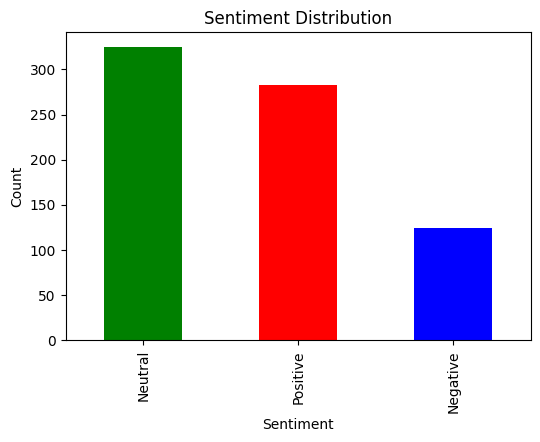

In [38]:
# Visualization - Sentiment Distribution
plt.figure(figsize=(6,4))
df['Sentiment'].value_counts().plot(kind='bar' , color=['green', 'red', 'blue'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

Text(0.5, 1.0, 'Trending Topics Word Cloud')

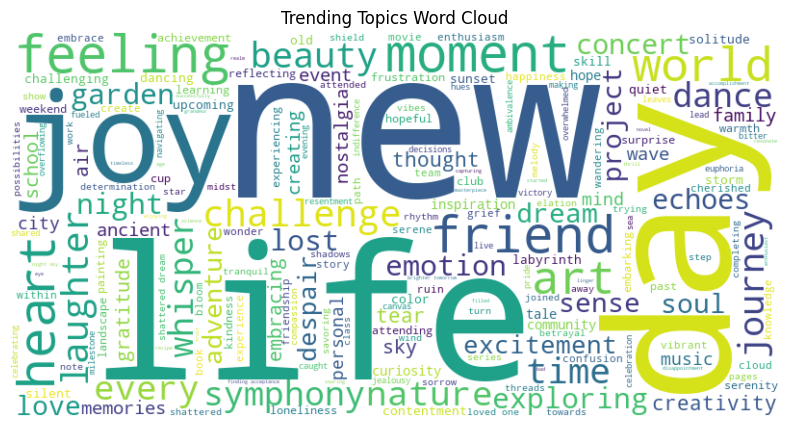

In [39]:
# Word Cloud for Trending Topics
all_words = ' '.join(df['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Trending Topics Word Cloud")